## Individual household electric power consumption
#### https://archive.ics.uci.edu/dataset/484/travel+reviews

#Additional Variable Information
Atributes represent average user feedback


In [2]:
import pandas as pd 
import numpy as np
from pathlib import Path
print()
Power_consumption = pd.read_csv(f'{Path.cwd()}/household_power_consumption.txt'
            , delimiter=';')


/tmp/ipykernel_145171/3752034430.py:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  Power_consumption = pd.read_csv(f'{Path.cwd()}/household_power_consumption.txt'


#### The most significant difference between the active and reactive power is that the active power is the actual power which is dissipated in the circuit. Whereas, the reactive power is the useless power which only flows between the source and load. 


In [3]:
Power_consumption

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [4]:
mask = pd.to_numeric(Power_consumption['Global_active_power'], errors='coerce').isna()
df_filtered = Power_consumption[~mask]

In [41]:
df_filtered.to_csv(f'{Path.cwd()}/household_power_consumption.csv', index=None)

In [5]:
# Travel_Reviews = Travel_Reviews[~(Travel_Reviews['theaters'] <= 1)]  
# Travel_Reviews = Travel_Reviews.sort_values('theaters')

In [6]:


import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

revs_X = np.array([float(i) for i in df_filtered['Global_active_power']])
random_noise  = []
for Xs in revs_X:
    random_val = np.random.uniform(0.01, 0.70)
    random_noise += [random_val] 
revs_y  = 0.9 * revs_X + random_noise
revs_y = np.array([float(i) for i in revs_y])
revs_X = np.reshape(revs_X, (-1, 1))
revs_y = np.reshape(revs_y, (-1, 1))


In [7]:
print(len(revs_y), max(revs_y), ' ', revs_y)

2049280 [10.61065946]   [[4.18308132]
 [5.32748066]
 [5.26250673]
 ...
 [0.94443001]
 [1.33635956]
 [1.17744221]]


In [8]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [9]:
# Shuffle data
X = revs_X
y = revs_y
NUM_SAMPLES = len(df_filtered['Global_active_power'])
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [10]:
# Split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [11]:
# Split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (1434496, 1), y_train: (1434496, 1)
X_val: (307392, 1), y_test: (307392, 1)
X_test: (307392, 1), y_test: (307392, 1)


In [12]:
def normalize_data(data, mean, std):
    return (data - mean)/std

In [13]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [14]:
# Standardize
X_train = normalize_data(X_train, X_mean, X_std)
y_train = normalize_data(y_train, y_mean, y_std)
X_val = normalize_data(X_val, X_mean, X_std)
y_val = normalize_data(y_val, y_mean, y_std)
X_test = normalize_data(X_test, X_mean, X_std)
y_test = normalize_data(y_test, y_mean, y_std)

In [15]:

# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.0, std: 1.0
mean: -0.0, std: 1.0


In [16]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional
print(INPUT_DIM, OUTPUT_DIM)

1 1


In [17]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


In [18]:

# Forward pass [NX1] · [1X1] = [NX1]
y_pred = np.dot(X_train, W) + b
print (f"y_pred: {y_pred.shape}")

y_pred: (1434496, 1)


In [19]:
# Loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print (f"loss: {loss:.2f}")

loss: 0.99


In [20]:
# Backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

In [21]:
LEARNING_RATE = 1e-1

In [22]:

# Update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

In [23]:
NUM_EPOCHS = 100

In [24]:
def gd():
    # Initialize random weights
    W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
    b = np.zeros((1, ))

    # gradient descent
    # Training loop
    for epoch_num in range(NUM_EPOCHS):
        # Forward pass [NX1] · [1X1] = [NX1]
        y_pred = np.dot(X_train, W) + b

        # Loss
        loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

        # Show progress
        if epoch_num%10 == 0:
            print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

        # Backpropagation
        dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
        db = -(2/N) * np.sum((y_train - y_pred) * 1)

        # Update weights
        W += -LEARNING_RATE * dW
        b += -LEARNING_RATE * db

    return W, b

In [25]:
def sgd():
    # Initialize random weights
    W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
    b = np.zeros((1, ))

    # stochastic gradient descent
    # Training loop
    batch_size = 20
    train_xy = np.append(X_train, y_train, axis=1)


    for epoch_num in range(NUM_EPOCHS):
        # shuffle
        np.random.shuffle(train_xy)

        for start in range(0, N, batch_size):
            stop = start + int(batch_size / 2)
            # print(f'{start}, {stop}, {batch_size}')
            x_batch, y_batch = train_xy[start:stop, :-1], train_xy[start:stop, -1:]
            #x_batch, y_batch = X_train[start:stop], y_train[start:stop]


            y_pred = np.dot(x_batch, W) + b
            loss = (1 / len(y_batch)) * np.sum((y_batch - y_pred) ** 2)

            dW = -(2 / batch_size) * np.sum((y_batch - y_pred) * x_batch)
            db = -(2 / batch_size) * np.sum((y_batch - y_pred) * 1)

            # Update weights
            W += -LEARNING_RATE * dW
            b += -LEARNING_RATE * db
        # Show progress
        if epoch_num % 10 == 0:
            print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    return W, b

In [26]:
def sgd_momentum(decay_rate=0.0):
    # Initialize random weights
    W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
    b = np.zeros((1, ))

    # stochastic gradient descent
    # Training loop
    batch_size = 10
    train_xy = np.append(X_train, y_train, axis=1)


    for epoch_num in range(NUM_EPOCHS):
        # shuffle
        np.random.shuffle(train_xy)

        for start in range(0, N, batch_size):
            stop = start + batch_size
            # print(f'{start}, {stop}, {batch_size}')
            x_batch, y_batch = train_xy[start:stop, :-1], train_xy[start:stop, -1:]
            #x_batch, y_batch = X_train[start:stop], y_train[start:stop]


            y_pred = np.dot(x_batch, W) + b
            loss = (1 / len(y_batch)) * np.sum((y_batch - y_pred) ** 2)

            dW = -(2 / batch_size) * np.sum((y_batch - y_pred) * x_batch)
            db = -(2 / batch_size) * np.sum((y_batch - y_pred) * 1)

            # Update weights
            W += decay_rate * dW - LEARNING_RATE * dW
            b += decay_rate * db - LEARNING_RATE * db
        # Show progress
        if epoch_num % 10 == 0:
            print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    return W, b

Gradient descent
Epoch: 0, loss: 1.027
Epoch: 10, loss: 0.053
Epoch: 20, loss: 0.042
Epoch: 30, loss: 0.042
Epoch: 40, loss: 0.042
Epoch: 50, loss: 0.042


Epoch: 60, loss: 0.042
Epoch: 70, loss: 0.042
Epoch: 80, loss: 0.042
Epoch: 90, loss: 0.042
W: [[0.97881908]]; b: [-6.18099605e-17];
train_MSE: 0.04, test_MSE: 0.04


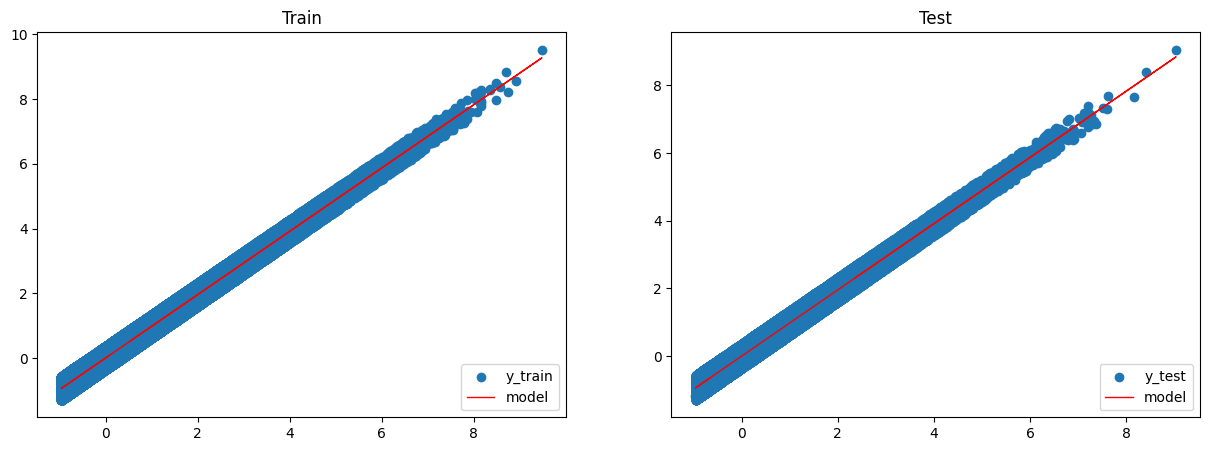

Stochastic gradient descent
Epoch: 0, loss: 0.038
Epoch: 10, loss: 0.042
Epoch: 20, loss: 0.045
Epoch: 30, loss: 0.051
Epoch: 40, loss: 0.050
Epoch: 50, loss: 0.059
Epoch: 60, loss: 0.028
Epoch: 70, loss: 0.034
Epoch: 80, loss: 0.049
Epoch: 90, loss: 0.040
W: [[1.00984281]]; b: [0.01779886];
train_MSE: 0.04, test_MSE: 0.04


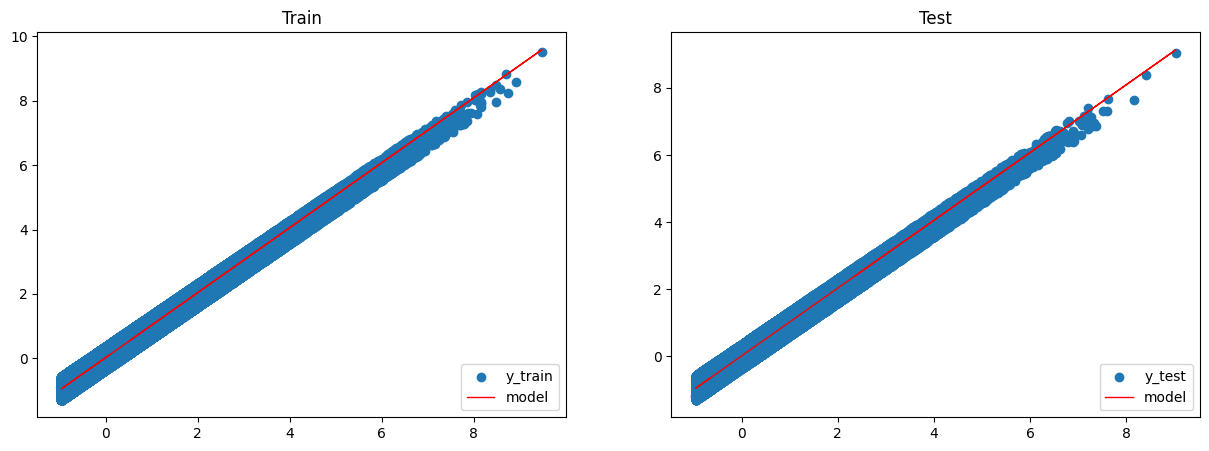

Stochastic gradient descent with momentum
Epoch: 0, loss: 0.050
Epoch: 10, loss: 0.060
Epoch: 20, loss: 0.015
Epoch: 30, loss: 0.075
Epoch: 40, loss: 0.047
Epoch: 50, loss: 0.048
Epoch: 60, loss: 0.030
Epoch: 70, loss: 0.047
Epoch: 80, loss: 0.053
Epoch: 90, loss: 0.018
W: [[0.97038257]]; b: [-0.04006648];
train_MSE: 0.04, test_MSE: 0.04


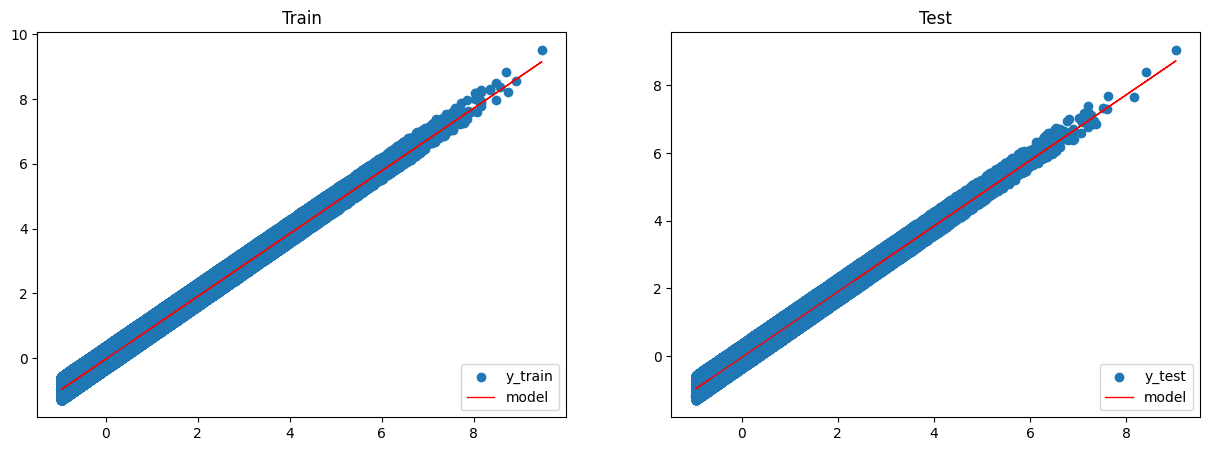

In [27]:
def evaluation(W, b):
    print(f'W: {W}; b: {b};')
    # Predictions 
    pred_train = W * X_train + b
    pred_test = W * X_test + b

    # Train and test MSE
    train_mse = np.mean((y_train - pred_train) ** 2)
    test_mse = np.mean((y_test - pred_test) ** 2)
    print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

    # Figure size
    plt.figure(figsize=(15,5))

    # Plot train data
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plt.scatter(X_train, y_train, label="y_train")
    plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
    plt.legend(loc="lower right")

    # Plot test data
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plt.scatter(X_test, y_test, label='y_test')
    plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
    plt.legend(loc="lower right")

    # Show plots
    plt.show()

print('Gradient descent')
W, b = gd()
evaluation(W, b)

print('Stochastic gradient descent')
W, b = sgd()
evaluation(W, b)

print('Stochastic gradient descent with momentum')
W, b = sgd_momentum(0.01)
evaluation(W, b)

In [28]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 0.9X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}") 

[actual] y = 0.9X + noise
[model] y_hat = 0.9X + 0.3


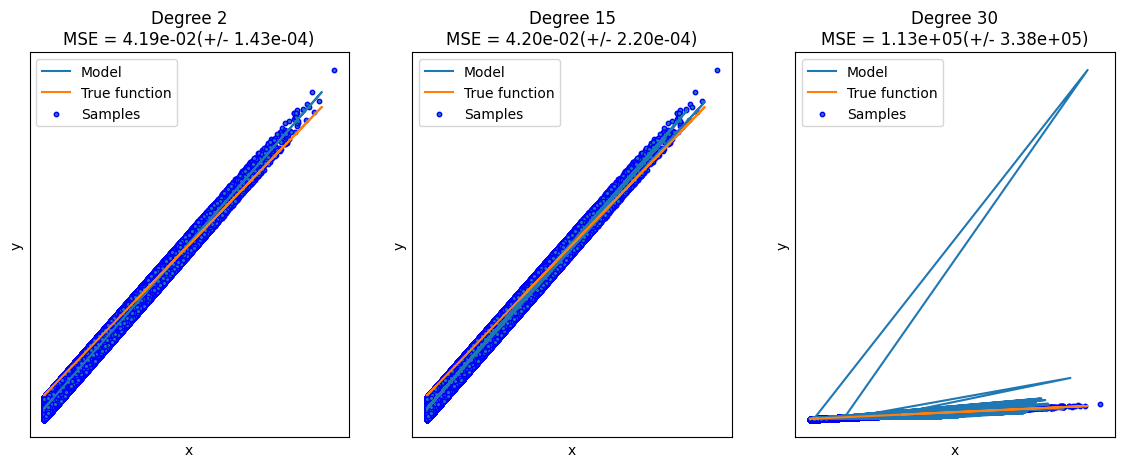

In [29]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return W_unscaled[0][0] * X + b_unscaled[0]

np.random.seed(0)

degrees = [2, 15, 30]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X_train, y_train)

    # Make predictions based on test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X_train, y_train, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(X_test, y_pred, label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X_train, y_train, edgecolor="b", s=10, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()


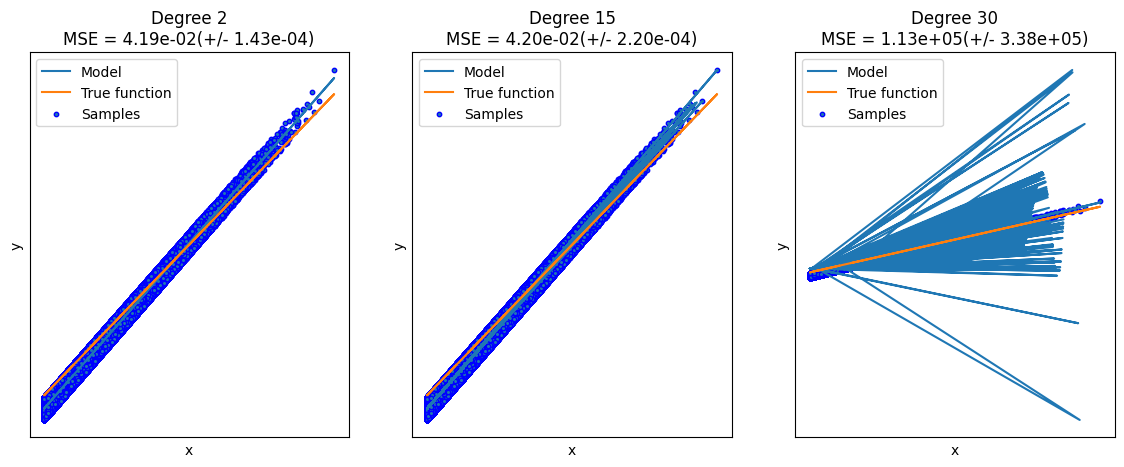

In [30]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return W_unscaled[0][0] * X + b_unscaled[0]

np.random.seed(0)

degrees = [2, 15, 30]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X_train, y_train)

    # Make predictions based on train data
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the models using cross-validation on train data
    scores_train = cross_val_score(
        pipeline, X_train, y_train, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(X_train, y_pred_train, label="Model")
    plt.plot(X_train, true_fun(X_train), label="True function")
    plt.scatter(X_train, y_train, edgecolor="b", s=10, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores_train.mean(), scores_train.std()
        )
    )
plt.show()


## Find best alpha(regularization)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define the range of alpha values to test
param_grid = {'ridge_regression__alpha': [0.01, 0.1, 1, 10]}

# Create a pipeline with polynomial features and Ridge regression
pipeline = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=degrees[i], include_bias=False)),
    ("ridge_regression", Ridge())
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring="neg_mean_squared_error", cv=10)
grid_search.fit(X_train, y_train)

# Get the best regularization value and corresponding MSE score
best_alpha = grid_search.best_params_['ridge_regression__alpha']
best_score = -grid_search.best_score_

print("Best Regularization Value:", best_alpha)
print("Best MSE Score:", best_score)

Best Regularization Value: 0.01
Best MSE Score: 1.4718890112143255


/home/petr/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.66827e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/petr/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.01425e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/petr/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.8834e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/petr/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.04438e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/petr/.local/lib/python3.8/site-packages/sklearn/linear_mode

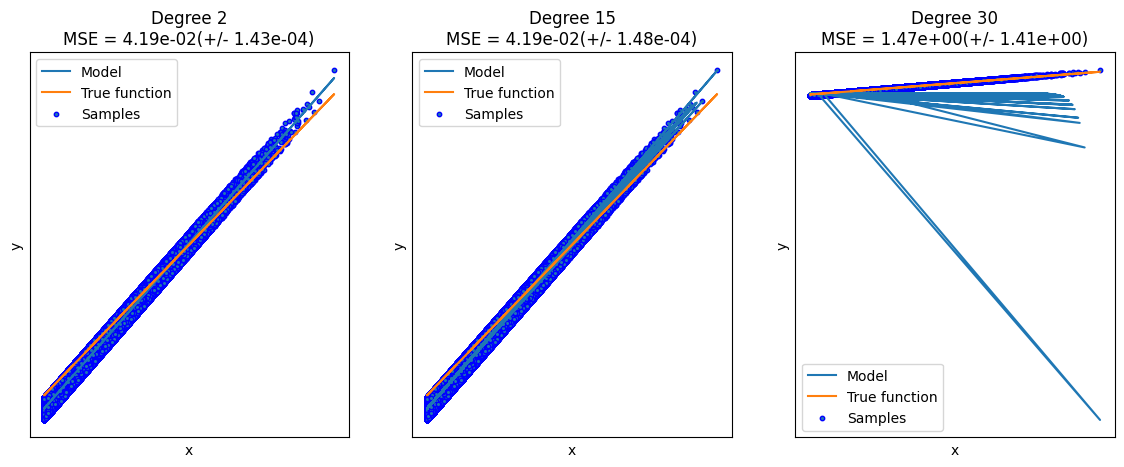

In [39]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return W_unscaled[0][0] * X + b_unscaled[0]

np.random.seed(0)

degrees = [2, 15, 30]
alpha = 0.01  # Regularization strength

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    ridge_regression = Ridge(alpha=alpha)
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("ridge_regression", ridge_regression),
        ]
    )
    pipeline.fit(X_train, y_train)

    # Make predictions based on train data
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the models using cross-validation on train data
    scores_train = cross_val_score(
        pipeline, X_train, y_train, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(X_train, y_pred_train, label="Model")
    plt.plot(X_train, true_fun(X_train), label="True function")
    plt.scatter(X_train, y_train, edgecolor="b", s=10, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores_train.mean(), scores_train.std()
        )
    )
plt.show()


In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset for classification
X, y = make_classification(n_samples=1000, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Predict on the test data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.82


## PERCEPTRON

In [47]:
# -*- coding: utf-8 -*- 
#Необходимые импорты 
import numpy as np 
import pandas 
from sklearn.linear_model import Perceptron 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 
from sklearn.neural_network import MLPClassifier 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
#функция расчета медианы 
def median(lst): 
 return np.median(np.array(lst)) 

In [55]:
max([float(power) for power in df_filtered['Global_active_power'].to_list()])


11.122

In [56]:
min([float(power) for power in df_filtered['Global_active_power'].to_list()])

0.076

In [68]:
rs = np.linspace(0,100,num=100)

In [69]:
acc_p = [] 
acc_pn = [] 
acc_mlp = [] 
acc_mlpn = [] 

In [70]:
#Цикл прогона моделей 
for i in rs: 
    i = int(i) 
    #Распечатка номера итерации 
    print ("Random: ", i )
    #Создание модели персептрона 
    clf = Perceptron(random_state=i, alpha=0.01, max_iter=2000) 
    #Обучение модели 
    clf.fit(X_train, y_train) 
    #Получение прогноза 
    predictions = clf.predict(X_test) 
    # Расчет показателя accuracy 
    acc = accuracy_score(y_test, predictions) 
    #Распечатка результата 
    print ("Perceptron: ", acc )
    #Добавление оценки в список оценок для модели персептрона 
    acc_p.append(acc) 
    #Нормализация данных 
    scaler = StandardScaler() 
    X_train_scaled = scaler.fit_transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 
    #Работа пресептрона с нормализованными данными 
    clf = Perceptron(random_state=i, alpha=0.01, max_iter=2000) 
    clf.fit(X_train_scaled, y_train) 
    predictions = clf.predict(X_test_scaled) 
    acc = accuracy_score(y_test, predictions) 
    print ("Perceptron with normalization: ", acc )
    acc_pn.append(acc) 
    #Создание многослойного классификатора 
    mlp = MLPClassifier(random_state=i, solver="adam", activation="logistic", alpha=0.01, ###########################################
    hidden_layer_sizes=(2, ), max_iter=200, tol=1e-4)
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Random:  0
Perceptron:  0.765
Perceptron with normalization:  0.805
Random:  1
Perceptron:  0.805
Perceptron with normalization:  0.81
Random:  2
Perceptron:  0.805
Perceptron with normalization:  0.71
Random:  3
Perceptron:  0.735
Perceptron with normalization:  0.77
Random:  4
Perceptron:  0.77
Perceptron with normalization:  0.785
Random:  5
Perceptron:  0.825
Perceptron with normalization:  0.835
Random:  6
Perceptron:  0.785
Perceptron with normalization:  0.79
Random:  7
Perceptron:  0.745
Perceptron with normalization:  0.765
Random:  8
Perceptron:  0.805
Perceptron with normalization:  0.83
Random:  9
Perceptron:  0.83
Perceptron with normalization:  0.775
Random:  10
Perceptron:  0.695
Perceptron with normalization:  0.73
Random:  11
Perceptron:  0.845
Perceptron with normalization:  0.83
Random:  12
Perceptron:  0.71
Perceptron with normalization:  0.67
Random:  13
Perceptron:  0.785
Perceptron with normalization:  0.79
Random:  14
Perceptron:  0.785
Perceptron with normaliza

In [1]:
mlp.fit(X_train, y_train) 
#Работа с ненормализованными данными 
predictions = mlp.predict(X_test) 
acc = accuracy_score(y_test, predictions) 
print ("MLP: ", acc) 
acc_mlp.append(acc) 
#Работа с нормализованными данными 
mlp = MLPClassifier(random_state=i, solver="adam", activation="logistic", alpha=0.01, ################################
hidden_layer_sizes=(2, ), max_iter=200, tol=1e-4) 
mlp.fit(X_train_scaled, y_train) 
predictions = mlp.predict(X_test_scaled) 
acc = accuracy_score(y_test, predictions) 
print ("MLPwith Norm: ", acc) 
acc_mlpn.append(acc) 
#Распечатка итоговых результатов 
print ("Perceptron: ", min(acc_p), median(acc_p), max(acc_p), np.std(acc_p))
print ("Perceptron with Norm: ", min(acc_pn), median(acc_pn), max(acc_pn), 
np.std(acc_pn)) 
print ("MLP: ", min(acc_mlp), median(acc_mlp), max(acc_mlp), np.std(acc_mlp)) 
print ("MLP with Norm: ", min(acc_mlpn), median(acc_mlpn), max(acc_mlpn), 
np.std(acc_mlpn)) 
#Расчет минимума и максимума для графика 
X = np.concatenate((X_train, X_test), axis=0) 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
#Построение графика 
figure = plt.figure(figsize=(17, 9)) 
cm = plt.cm.RdBu 
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
ax = plt.subplot(1, 1, 1) 
# Точки из обучающей выборки 
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright) 
# Тестовые точки 
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6) 
ax.set_xlim(x_min, x_max) 
ax.set_ylim(y_min, y_max) 
ax.set_xticks(()) 
ax.set_yticks(()) 
plt.show() 

NameError: name 'mlp' is not defined